In [11]:
%pylab inline

from skimage import exposure
from skimage import data
from skimage import color

Populating the interactive namespace from numpy and matplotlib


In [12]:
img = color.rgb2gray(data.astronaut())

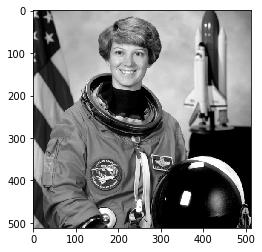

In [13]:
imshow(img,cmap='gray')

In [35]:
# qualcheappunto
first_fft = np.fft.fftshift(np.fft.fft2(img))
#Shifta la componente a frequenza zero, ossia la continua,
# al centro dello spettro

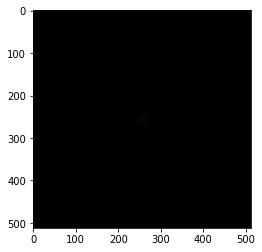

In [19]:
imshow(np.abs(first_fft), cmap='gray')
#Non si vede nulla perché la potenza è così elevata che occorre
#utilizzare una scala logaritmica.

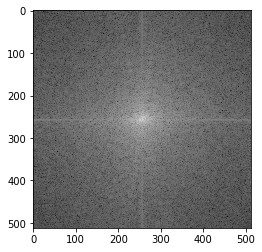

In [20]:
imshow(np.log(np.abs(first_fft)), cmap='gray')

#utilizziamo il logaritmo della trasformata di Fourier per visualizzare l'immagine

In [21]:
def ideal2d_low_pass(shape, f, pxd=1):
    """Designs an ideal filter with cutoff frequency f. pxd defines the number
   of pixels per unit of frequency (e.g., degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = np.ones(shape)
    filt[radius>f] = 0
    return filt

"""con questo codice stiamo dando una dimensione al cerchio al centro"""

'con questo codice stiamo dando una dimensione al cerchio al centro'

In [28]:
filtro = ideal2d_low_pass(img.shape,10)
#Passiamo l'immagine su cui lavorare e il raggio, corrispondente alle frequenze
#che decidiamo possono passare. Sarebbe la f definita precedentemente nell'implementazione
#del filtro.

In [34]:
imshow(filtro, cmap='gray')

In [36]:
response_fft = first_fft * filtro

In [37]:
new_image = np.abs(np.fft.ifft2(np.fft.ifftshift(response_fft)))
#La i serve a mostrare l'antitrasformata

In [38]:
imshow(new_image,cmap='gray')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


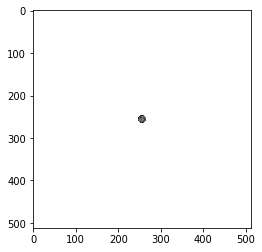

In [39]:
imshow(np.log(np.abs(response_fft)), cmap='gray') #antitrasformando la trasfofmata filtrata, ossia l'immagine seguente, otteniamo l'immagine di prima

In [43]:
filtro2 = ideal2d_low_pass(img.shape,50)

In [45]:
filtro2 = 1-filtro2 
"""trucchetto per ottenere il filtro passa alto, togliendo all'intero la parte del filtro2 definito di diametro 100"""

"trucchetto per ottenere il filtro passa alto, togliendo all'intero la parte del filtro2 definito di diametro 100"

In [46]:
imshow(filtro2,cmap='gray')

In [47]:
response_fft2 = first_fft * filtro2

In [48]:
new_image2 = np.abs(np.fft.ifft2(np.fft.ifftshift(response_fft2)))

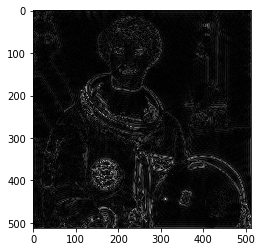

In [49]:
imshow(new_image2,cmap='gray')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


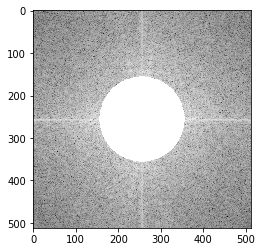

In [38]:
imshow(np.log(np.abs(response_fft2)), cmap='gray')

In [50]:
def butter2d_lp(shape, f, n, pxd=1):
    """Designs an n-th order lowpass 2D Butterworth filter with cutoff
   frequency f. pxd defines the number of pixels per unit of frequency (e.g.,
   degrees of visual angle)."""
    pxd = float(pxd)
    rows, cols = shape
    x = np.linspace(-0.5, 0.5, cols)  * cols / pxd
    y = np.linspace(-0.5, 0.5, rows)  * rows / pxd
    radius = np.sqrt((x**2)[np.newaxis] + (y**2)[:, np.newaxis])
    filt = 1 / (1.0 + (radius / f)**(2*n))
    return filt

In [53]:
filtro_butter = butter2d_lp(img.shape,20,1)
#col primo valore, 10, definisco il diametro, con il secondo valore, definiamo la gradualità con cui si ha il passaggio tra frequenze accettate e non accettate, 
#più si va verso lo zero più il passagio è smussato

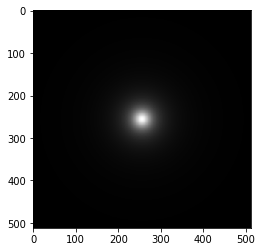

In [54]:
imshow(filtro_butter,cmap='gray')

In [63]:
response_to_butter = first_fft * filtro_butter

In [64]:
new_image_butterFiltered = np.abs(np.fft.ifft2(np.fft.ifftshift(response_to_butter)))

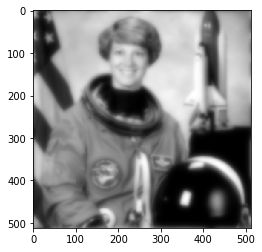

In [66]:
imshow(new_image_butterFiltered,cmap='gray')

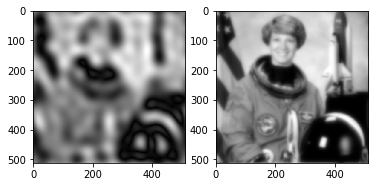

In [67]:
f, axarr = plt.subplots(1,2)
axarr[0].imshow(new_image, cmap=cm.gray)
axarr[1].imshow(new_image_butterFiltered, cmap='gray')

#a sinistra metto l'immagine col filtro ideale e a destra quello con butterworth

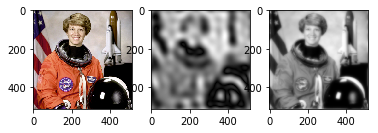

In [68]:
f, axarr2 = plt.subplots(1,3)
axarr2[0].imshow(data.astronaut())
axarr2[1].imshow(new_image, cmap=cm.gray)
axarr2[2].imshow(new_image_butterFiltered, cmap='gray')

#a sinitra metto l'immagine di partenza, al centro quella col filtro ideale e a destra quello con butterworth